In [124]:
import pandas as pd
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
import numpy as np

In [195]:
df = pd.read_excel('./指标.xlsx')

In [196]:
df

,日期,收盘利率:IBO001,国债到期收益率:10年,贷款市场报价利率(LPR):1年,企业债收益率曲线(BBB):1年,上证综合指数,新建商品住房价格指数(上年同期=100),CFETS人民币汇率指数
0,2023-07-07,1.12,2.6391,NaN,17.8120,3196.61,NaN,NaN
1,2023-07-06,1.30,2.6405,NaN,17.7907,3205.57,NaN,NaN
2,2023-07-05,1.42,2.6414,NaN,17.8036,3222.95,NaN,NaN
3,2023-07-04,1.19,2.6500,NaN,17.8161,3245.35,NaN,NaN
4,2023-07-03,1.37,2.6409,NaN,17.8464,3243.98,NaN,NaN
...,...,...,...,...,...,...,...,...
727,2020-08-21,2.60,2.9832,NaN,16.1975,3380.68,NaN,92.49
728,2020-08-20,2.20,2.9946,3.85,16.1806,3363.90,NaN,NaN
729,2020-08-19,2.19,2.9869,NaN,16.1596,3408.13,NaN,NaN
730,2020-08-18,2.12,2.9670,NaN,16.1478,3451.09,NaN,NaN


In [197]:
df['日期'] = pd.to_datetime(df['日期'])

In [198]:
# 提取年份和月份
df['年份'] = df['日期'].dt.year
df['月份'] = df['日期'].dt.month

In [199]:
df

,日期,收盘利率:IBO001,国债到期收益率:10年,贷款市场报价利率(LPR):1年,企业债收益率曲线(BBB):1年,上证综合指数,新建商品住房价格指数(上年同期=100),CFETS人民币汇率指数,年份,月份
0,2023-07-07,1.12,2.6391,NaN,17.8120,3196.61,NaN,NaN,2023,7
1,2023-07-06,1.30,2.6405,NaN,17.7907,3205.57,NaN,NaN,2023,7
2,2023-07-05,1.42,2.6414,NaN,17.8036,3222.95,NaN,NaN,2023,7
3,2023-07-04,1.19,2.6500,NaN,17.8161,3245.35,NaN,NaN,2023,7
4,2023-07-03,1.37,2.6409,NaN,17.8464,3243.98,NaN,NaN,2023,7
...,...,...,...,...,...,...,...,...,...,...
727,2020-08-21,2.60,2.9832,NaN,16.1975,3380.68,NaN,92.49,2020,8
728,2020-08-20,2.20,2.9946,3.85,16.1806,3363.90,NaN,NaN,2020,8
729,2020-08-19,2.19,2.9869,NaN,16.1596,3408.13,NaN,NaN,2020,8
730,2020-08-18,2.12,2.9670,NaN,16.1478,3451.09,NaN,NaN,2020,8


In [200]:
# data输入为列名
def day_diff(col_name):
    result1 = df_scaled.groupby(['年份', '月份']).agg({col_name: ['sum', 'count']})
    result1['每三个月总数'] = result1[col_name]['sum'].rolling(window=3, min_periods=1).sum()
    result1['每三个月天数'] = result1[col_name]['count'].rolling(window=3, min_periods=1).sum()
    result1['每三个月平均值'] = result1['每三个月总数']/result1['每三个月天数']
    result1['3M_Ago'] = result1['每三个月平均值'].shift(3)
    result1['Diff'] = result1['每三个月平均值'] - result1['3M_Ago']
    
    return result1['Diff']

In [201]:
def month_diff(col_name):
    result = df_scaled[df_scaled[col_name].notnull()]
    result = result[["年份","月份" ,col_name]]
    result['3M_Ago'] = result[col_name].shift(3)
    result['Diff'] = result[col_name] - result['3M_Ago']
    
    return result['Diff']

In [202]:
df.set_index('日期', inplace=True)

In [203]:
result = df.resample('BM').last()

In [204]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled

,收盘利率:IBO001,国债到期收益率:10年,贷款市场报价利率(LPR):1年,企业债收益率曲线(BBB):1年,上证综合指数,新建商品住房价格指数(上年同期=100),CFETS人民币汇率指数,年份,月份
0,-1.112448,-1.493393,NaN,0.169463,-0.904362,NaN,NaN,1.545063,0.130840
1,-0.779222,-1.485920,NaN,0.127082,-0.853495,NaN,NaN,1.545063,0.130840
2,-0.557070,-1.481116,NaN,0.152750,-0.754826,NaN,NaN,1.545063,0.130840
3,-0.982860,-1.435211,NaN,0.177621,-0.627658,NaN,NaN,1.545063,0.130840
4,-0.649633,-1.483785,NaN,0.237911,-0.635435,NaN,NaN,1.545063,0.130840
...,...,...,...,...,...,...,...,...,...
727,1.627417,0.343343,NaN,-3.042996,0.140631,NaN,-2.285259,-1.689406,0.416734
728,0.886913,0.404194,1.016398,-3.076623,0.045369,NaN,NaN,-1.689406,0.416734
729,0.868400,0.363093,NaN,-3.118407,0.296469,NaN,NaN,-1.689406,0.416734
730,0.738812,0.256871,NaN,-3.141887,0.540359,NaN,NaN,-1.689406,0.416734


In [205]:
column_to_normalize = '上证综合指数'

result[column_to_normalize] = scaler.fit_transform(result[[column_to_normalize]])

In [206]:
data = pd.DataFrame()
data['年份'] = result['年份'].reset_index(drop=True)
data['月份'] = result['月份'].reset_index(drop=True)
data['FFR'] = day_diff('收盘利率:IBO001').reset_index(drop=True)
data['10YT rate'] = day_diff('国债到期收益率:10年').reset_index(drop=True)
data['Mortg. Rate'] = day_diff('贷款市场报价利率(LPR):1年').reset_index(drop=True)
data['Triple B rate'] = day_diff('企业债收益率曲线(BBB):1年').reset_index(drop=True)
data['Equity'] = result['上证综合指数'].reset_index(drop=True)
data['Housing'] = month_diff('新建商品住房价格指数(上年同期=100)').reset_index(drop=True)

result1 = df_scaled[df_scaled['CFETS人民币汇率指数'].notnull()]
result1 = result1[["年份","月份" ,'CFETS人民币汇率指数']]
result1 = df_scaled.groupby(['年份', '月份']).agg({"CFETS人民币汇率指数": ['sum', 'count']})
result1['每三个月总数'] = result1['CFETS人民币汇率指数']['sum'].rolling(window=3, min_periods=1).sum()
result1['每三个月天数'] = result1['CFETS人民币汇率指数']['count'].rolling(window=3, min_periods=1).sum()
result1['每三个月平均值'] = result1['每三个月总数']/result1['每三个月天数']
result1['3M_Ago'] = result1['每三个月平均值'].shift(3)
result1['Diff'] = result1['每三个月平均值'] - result1['3M_Ago']
data['Dollar'] = result1['Diff'].reset_index(drop=True)

In [207]:
data

,年份,月份,FFR,10YT rate,Mortg. Rate,Triple B rate,Equity,Housing,Dollar
0,2020,8,NaN,NaN,NaN,NaN,0.328620,NaN,NaN
1,2020,9,NaN,NaN,NaN,NaN,-0.654841,NaN,NaN
2,2020,10,NaN,NaN,NaN,NaN,-0.618964,NaN,NaN
3,2020,11,-0.132871,0.903020,0.000000,0.627587,0.306917,-0.518852,0.712615
4,2020,12,-0.507606,0.823567,0.000000,1.146370,0.757095,-0.571489,0.568418
5,2021,1,-0.412007,0.547051,0.000000,1.964182,0.812461,-0.353421,0.507081
6,2021,2,-0.649034,0.168413,0.000000,2.481752,0.956467,-0.176710,0.323675
7,2021,3,0.459927,-0.129299,0.000000,2.141731,0.584576,-0.056397,0.444695
8,2021,4,0.032938,-0.005322,0.000000,1.269423,0.611982,-0.003760,0.400069
9,2021,5,0.352434,-0.170740,0.000000,0.252946,1.545559,0.086475,0.406189


In [208]:
coefficient = pd.read_excel('./系数.xlsx')
coefficient.set_index('Weights', inplace=True)
coefficient

,FFR,10YT rate,Mortg. Rate,Triple B rate,Equity,Housing,Dollar
Weights,,,,,,,
β4−β0�4−�0,0.09994,-0.00815,0.21743,0.07927,-0.02132,-0.03223,0.048
β5−β1�5−�1,0.06858,-0.01400,0.14525,0.09118,-0.02022,-0.03127,0.048
β6−β2�6−�2,0.05093,-0.01839,0.11905,0.09864,-0.01844,-0.02970,0.045
β7−β3�7−�3,0.03039,-0.02152,0.07750,0.10047,-0.01616,-0.02676,0.039
β8−β4�8−�4,0.02569,-0.02322,0.06243,0.10065,-0.01444,-0.01978,0.031
β9−β5�9−�5,0.02001,-0.02437,0.04514,0.09958,-0.01302,-0.01342,0.023
β10−β6�10−�6,0.01581,-0.02522,0.03370,0.09766,-0.01175,-0.00605,0.017
β11−β7�11−�7,0.01135,-0.02591,0.02484,0.09535,-0.01066,0.00077,0.012
β12−β8�12−�8,0.00739,-0.02640,0.01846,0.09277,-0.00970,0.00424,0.008


In [209]:
index = []
time = []
for j in range(3,22):
    sum_curr = 0
    n = 0
    for i in range(4):
        sum_curr += np.dot(coefficient.iloc[i], data.iloc[-i-j-3*n, 2:9])
        n += 1
    time.append(data.iloc[-j, 0:2])   
    index.append(sum_curr)

In [189]:
len(data)

36

In [220]:
date_strings = [f"{int(year)}-{int(month):02d}" for year, month in time]
dates = [datetime.strptime(date_str, "%Y-%m") for date_str in date_strings]

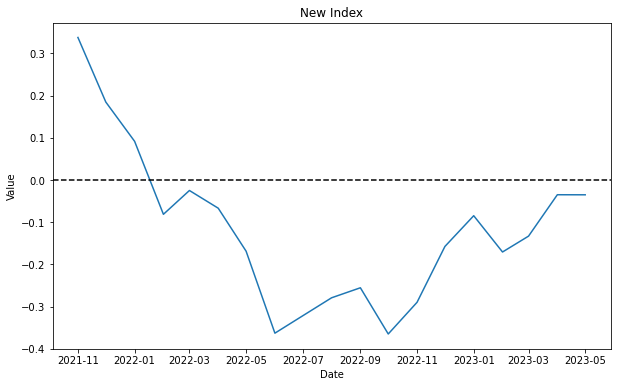

In [222]:
import matplotlib.pyplot as plt

# 创建示例数据
data = {
    'Date': dates,
    'index': index
}
df = pd.DataFrame(data)

# 设置图形尺寸
plt.figure(figsize=(10, 6))

# 绘制折线图
plt.plot(df['Date'], df['index'])

plt.axhline(0, color='black', linestyle='--')
# 设置图形标题和轴标签
plt.title('New Index')
plt.xlabel('Date')
plt.ylabel('Value')

# 显示图形
plt.show()
